To do:

1. Bin the genome by diversity
2. Assign COs to bins based on the diversity bin associated with their location in the genome

In [ ]:
%matplotlib inline
import sys, gzip
from annotation import annotation_table

import pandas as pd
import numpy as np
from scipy import stats
from pysam import TabixFile

In [ ]:
import sys
from annotation import annotation_table


############################################################################################################################################
def alleles_to_pi(alleles, min_called=None, MAF=True, AAF=False, ref_base = None, biallelic_only=None): 
    allele_list = [int(i) for i in alleles.split(':')]
    num_alleles = sum(allele_list)
    if min_called and num_alleles <= min_called:
        return (None, None, num_alleles)
    if biallelic_only and sorted(allele_list)[1] >0:
        return (None, None, num_alleles)
    try:
        MAF = sorted(allele_list)[-2]/num_alleles
        pi = (float(num_alleles)/(num_alleles - 1.0)) * (2.0 * MAF * (1-MAF))   
    except ZeroDivisionError:
        MAF = None
        pi = None
    return (MAF, pi, num_alleles)
############################################################################################################################################

chromosomes  = ['chromosome_1', 'chromosome_2', 'chromosome_3', 'chromosome_4', 'chromosome_5', 'chromosome_6', 'chromosome_7', 'chromosome_8', 'chromosome_9', 'chromosome_10', 'chromosome_11', 'chromosome_12', 'chromosome_13', 'chromosome_14', 'chromosome_15', 'chromosome_16', 'chromosome_17', 'scaffold_18', 'scaffold_19', 'scaffold_20', 'scaffold_21', 'scaffold_22', 'scaffold_23', 'scaffold_24', 'scaffold_25', 'scaffold_26', 'scaffold_27', 'scaffold_28', 'scaffold_29', 'scaffold_30', 'scaffold_31', 'scaffold_32', 'scaffold_33', 'scaffold_34', 'scaffold_35', 'scaffold_36', 'scaffold_37', 'scaffold_38', 'scaffold_39', 'scaffold_40', 'scaffold_41', 'scaffold_42', 'scaffold_43', 'scaffold_44', 'scaffold_45', 'scaffold_46', 'scaffold_47', 'scaffold_48', 'scaffold_49', 'scaffold_50', 'scaffold_51', 'scaffold_52', 'scaffold_53', 'scaffold_54', 'cpDNA', 'mtDNA', 'mtMinus']
ch_lengths = [8033585, 9223677, 9219486, 4091191, 3500558, 9023763, 6421821, 5033832, 7956127, 6576019, 3826814, 9730733, 5206065, 4157777, 1922860, 7783580, 7188315, 271631, 219038, 200793, 189560, 163774, 127913, 127161, 102191, 80213, 55320, 55278, 52813, 52376, 48183, 42264, 39192, 33576, 32450, 25399, 24537, 24437, 22408, 22082, 21325, 21000, 20974, 17736, 16939, 16627, 14746, 14165, 13462, 12727, 11225, 6241, 2479, 2277, 203828, 15758, 345555]

ch_data = {}
for i in range(len(chromosomes)):
     ch_data[chromosomes[i]] = ch_lengths[i]

from pysam import TabixFile        
annotation_table_file= '/scratch/research/references/chlamydomonas/5.3_chlamy_w_organelles_mt_minus/annotation/concatenated_GFF/annotation_table.txt.gz'
annotation_tabix = TabixFile(filename= annotation_table_file)
############################################################################################################################################


wdw_size =10000


#c = chromosomes[int(sys.argv[1])-1]
c = chromosomes[1]
#o=open('pi_windows.%s.txt' %c, 'w')
o=sys.stdout
print(c, ch_data[c])
for w in range(0,ch_data[c],wdw_size):
    start, end = w,min(w+wdw_size,ch_data[c])
    pi, pi_denominator, functional, intergenic, intronic, fold4 = [0]*6
    for site in annotation_tabix.fetch(c, start, end):
        site = annotation_table.annotation_line(site)
        if '1' in [site.intergenic, site.intronic, site.fold4]:
            MAF, site_pi, alleles = alleles_to_pi(site.quebec_alleles, min_called=12,biallelic_only=True)
            if site_pi !=None:
                pi += site_pi
                pi_denominator += 1
        if '1' in [site.utr5, site.utr3, site.fold0, site.fold2]:
            functional +=1
        for a in ['intergenic', 'intronic', 'fold4']:
            exec('%s += int(site.%s)' %(a,a))  
    
    #Summarise statistics
    try:
        o.write("\t".join([str(i) for i in [c, start, end, pi/pi_denominator, pi_denominator, functional, intergenic, intronic, fold4]]) + "\n")
    except ZeroDivisionError:
        o.write("\t".join([str(i) for i in [c, start, end, 'None', pi_denominator, functional, intergenic, intronic, fold4]]) + "\n")

o.close()

#parallel -i "python3 ./pi_windows.py {}" 1..57

I used a script of the above cell to run the 57 chromosomes in parallel

This is how you concatenate them 


In [ ]:
x = " ".join(["pi_windows.%s.txt" %i for i in chromosomes ])

cmd = "cat " + x + " >pi_windows.txt"

print(cmd)

In [ ]:
%%bash
#pwd
cat pi_windows.chromosome_1.txt pi_windows.chromosome_2.txt pi_windows.chromosome_3.txt pi_windows.chromosome_4.txt pi_windows.chromosome_5.txt pi_windows.chromosome_6.txt pi_windows.chromosome_7.txt pi_windows.chromosome_8.txt pi_windows.chromosome_9.txt pi_windows.chromosome_10.txt pi_windows.chromosome_11.txt pi_windows.chromosome_12.txt pi_windows.chromosome_13.txt pi_windows.chromosome_14.txt pi_windows.chromosome_15.txt pi_windows.chromosome_16.txt pi_windows.chromosome_17.txt pi_windows.scaffold_18.txt pi_windows.scaffold_19.txt pi_windows.scaffold_20.txt pi_windows.scaffold_21.txt pi_windows.scaffold_22.txt pi_windows.scaffold_23.txt pi_windows.scaffold_24.txt pi_windows.scaffold_25.txt pi_windows.scaffold_26.txt pi_windows.scaffold_27.txt pi_windows.scaffold_28.txt pi_windows.scaffold_29.txt pi_windows.scaffold_30.txt pi_windows.scaffold_31.txt pi_windows.scaffold_32.txt pi_windows.scaffold_33.txt pi_windows.scaffold_34.txt pi_windows.scaffold_35.txt pi_windows.scaffold_36.txt pi_windows.scaffold_37.txt pi_windows.scaffold_38.txt pi_windows.scaffold_39.txt pi_windows.scaffold_40.txt pi_windows.scaffold_41.txt pi_windows.scaffold_42.txt pi_windows.scaffold_43.txt pi_windows.scaffold_44.txt pi_windows.scaffold_45.txt pi_windows.scaffold_46.txt pi_windows.scaffold_47.txt pi_windows.scaffold_48.txt pi_windows.scaffold_49.txt pi_windows.scaffold_50.txt pi_windows.scaffold_51.txt pi_windows.scaffold_52.txt pi_windows.scaffold_53.txt pi_windows.scaffold_54.txt pi_windows.cpDNA.txt pi_windows.mtDNA.txt pi_windows.mtMinus.txt >pi_windows.txt

# Tabix the pi windows

In [ ]:
# %%bash

# bgzip -c pi_windows.txt >pi_windows.txt.bgz; wait
# tabix -s 1 -b 2 -e 3 pi_windows.txt.bgz

# Make a weighted histogram of pi in windows

So now you have to make a histo that uses the number of sites



In [3]:
pi_range = [0,0.1]
bin_number = 50
bin_width = (pi_range[1]-pi_range[0])/bin_number
bins = [(i/1000,round(i/1000+bin_width,3)) for i in range(0,100,2)]
print(bins)
pi_hist = {}
for b in bins:
    pi_hist[b] = {'sites':0, 'COs':0}
    
min_sites = 100    
for l in gzip.open("pi_windows.txt.bgz"):
    #e.g. "chromosome_5	16000	17000	0.0030	525"
    chromosome, start, end, pi, sites = l.split()
    if pi != 'None' and int(sites) > min_sites:
        for b in bins:
            if b[0] <= float(pi) < b[-1]:
                pi_hist[b]['sites'] += int(sites)
                break



[(0.0, 0.002), (0.002, 0.004), (0.004, 0.006), (0.006, 0.008), (0.008, 0.01), (0.01, 0.012), (0.012, 0.014), (0.014, 0.016), (0.016, 0.018), (0.018, 0.02), (0.02, 0.022), (0.022, 0.024), (0.024, 0.026), (0.026, 0.028), (0.028, 0.03), (0.03, 0.032), (0.032, 0.034), (0.034, 0.036), (0.036, 0.038), (0.038, 0.04), (0.04, 0.042), (0.042, 0.044), (0.044, 0.046), (0.046, 0.048), (0.048, 0.05), (0.05, 0.052), (0.052, 0.054), (0.054, 0.056), (0.056, 0.058), (0.058, 0.06), (0.06, 0.062), (0.062, 0.064), (0.064, 0.066), (0.066, 0.068), (0.068, 0.07), (0.07, 0.072), (0.072, 0.074), (0.074, 0.076), (0.076, 0.078), (0.078, 0.08), (0.08, 0.082), (0.082, 0.084), (0.084, 0.086), (0.086, 0.088), (0.088, 0.09), (0.09, 0.092), (0.092, 0.094), (0.094, 0.096), (0.096, 0.098), (0.098, 0.1)]


# Get the pi of each CO
file `all_break_points.txt` looks like this:

    cross	tetrad	individual	chromosome	left_bound	right_bound	mid_point	length
    C2	C2-1	C2-1.1	chromosome_1	2031009	2035598	2033303	4589


In [6]:
pi_table = TabixFile(filename= "pi_windows.txt.bgz")
min_sites = 100
for line in open("../all_break_points.txt").readlines()[1:]:
    cross, tetrad ,individual ,chromosome ,left_bound ,right_bound ,mid_point ,length = line.strip().split()
    pi_line = pi_table.fetch(chromosome, int(mid_point)-1, int(mid_point)).next()
    pi, sites = pi_line.strip().split()[-2:]
    if int(sites) > min_sites and pi != "None":
        for b in bins:
            if b[0] <= float(pi) < b[-1]:
                pi_hist[b]['COs'] += 1
                break

for b in bins:
    print(b, "\t", pi_hist[b])

(0.0, 0.002) 	 {'COs': 25, 'sites': 315670}
(0.002, 0.004) 	 {'COs': 16, 'sites': 474283}
(0.004, 0.006) 	 {'COs': 12, 'sites': 731942}
(0.006, 0.008) 	 {'COs': 22, 'sites': 884713}
(0.008, 0.01) 	 {'COs': 37, 'sites': 1110598}
(0.01, 0.012) 	 {'COs': 22, 'sites': 1217843}
(0.012, 0.014) 	 {'COs': 32, 'sites': 1373237}
(0.014, 0.016) 	 {'COs': 62, 'sites': 1508861}
(0.016, 0.018) 	 {'COs': 38, 'sites': 1660063}
(0.018, 0.02) 	 {'COs': 33, 'sites': 1763054}
(0.02, 0.022) 	 {'COs': 91, 'sites': 1829292}
(0.022, 0.024) 	 {'COs': 38, 'sites': 1802828}
(0.024, 0.026) 	 {'COs': 45, 'sites': 1895702}
(0.026, 0.028) 	 {'COs': 108, 'sites': 1850127}
(0.028, 0.03) 	 {'COs': 57, 'sites': 1785208}
(0.03, 0.032) 	 {'COs': 56, 'sites': 1726733}
(0.032, 0.034) 	 {'COs': 46, 'sites': 1631422}
(0.034, 0.036) 	 {'COs': 35, 'sites': 1564536}
(0.036, 0.038) 	 {'COs': 32, 'sites': 1407089}
(0.038, 0.04) 	 {'COs': 41, 'sites': 1264777}
(0.04, 0.042) 	 {'COs': 45, 'sites': 1122907}
(0.042, 0.044) 	 {'COs': 3

In [30]:
import pandas as pd

data= {'CO_density':[pi_hist[b]['COs']/pi_hist[b]['sites'] for b in bins ], \
        'Diversity':[(b[0]+b[1])/2 for b in bins], \
        'bins': bins, \
        'sites':[pi_hist[b]['sites'] for b in bins],
        'COs':[pi_hist[b]['COs'] for b in bins]
      }



    
df = pd.DataFrame.from_dict(data)
df.to_csv("pi_by_CO_density.1kbp.txt")

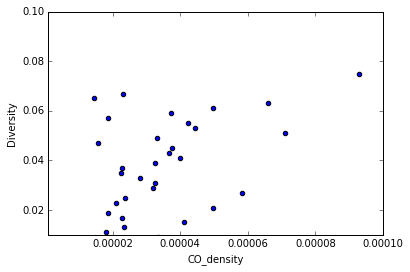

In [31]:
df.plot(kind='scatter',x='CO_density',y='Diversity', ylim=(0.01,0.1), xlim=(1e-6, 0.0001))

Correlation:  0.432439678654
(0.43243967865432886, 0.0075171576039807222)


,CO_density,COs,Diversity,bins,sites
0,0.000079,25,0.001,"(0.0, 0.002)",315670
1,0.000034,16,0.003,"(0.002, 0.004)",474283
2,0.000016,12,0.005,"(0.004, 0.006)",731942
3,0.000025,22,0.007,"(0.006, 0.008)",884713
4,0.000033,37,0.009,"(0.008, 0.01)",1110598


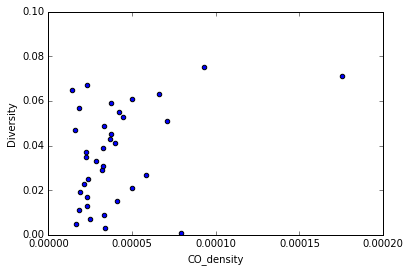

In [33]:
import scipy.stats  as stats


#Do it with stats functions. 

df_filter = df
df_filter = df[(df.COs>0) & (df.Diversity>0)]

df_filter.plot(kind='scatter',y='Diversity',x='CO_density', ylim=(0,0.1),xlim=(0,0.0002))
print("Correlation: ", df_filter.Diversity.corr(df_filter.CO_density))
fit  = stats.pearsonr(df_filter['Diversity'], df_filter['CO_density'])
print(fit)
df_filter.head()

---
# What if we make 10 kbp windows
---


Re run the pi_windows script
cat it 
tabix it

In [ ]:
%%bash
cat pi_windows.chromosome_1.txt pi_windows.chromosome_2.txt \
pi_windows.chromosome_3.txt pi_windows.chromosome_4.txt \
pi_windows.chromosome_5.txt pi_windows.chromosome_6.txt \
pi_windows.chromosome_7.txt pi_windows.chromosome_8.txt \
pi_windows.chromosome_9.txt pi_windows.chromosome_10.txt \
pi_windows.chromosome_11.txt pi_windows.chromosome_12.txt \
pi_windows.chromosome_13.txt pi_windows.chromosome_14.txt \
pi_windows.chromosome_15.txt pi_windows.chromosome_16.txt \
pi_windows.chromosome_17.txt pi_windows.scaffold_18.txt \
pi_windows.scaffold_19.txt pi_windows.scaffold_20.txt \
pi_windows.scaffold_21.txt pi_windows.scaffold_22.txt \
pi_windows.scaffold_23.txt pi_windows.scaffold_24.txt pi_windows.scaffold_25.txt pi_windows.scaffold_26.txt pi_windows.scaffold_27.txt pi_windows.scaffold_28.txt pi_windows.scaffold_29.txt pi_windows.scaffold_30.txt pi_windows.scaffold_31.txt pi_windows.scaffold_32.txt pi_windows.scaffold_33.txt pi_windows.scaffold_34.txt pi_windows.scaffold_35.txt pi_windows.scaffold_36.txt pi_windows.scaffold_37.txt pi_windows.scaffold_38.txt pi_windows.scaffold_39.txt pi_windows.scaffold_40.txt pi_windows.scaffold_41.txt pi_windows.scaffold_42.txt pi_windows.scaffold_43.txt pi_windows.scaffold_44.txt pi_windows.scaffold_45.txt pi_windows.scaffold_46.txt pi_windows.scaffold_47.txt pi_windows.scaffold_48.txt pi_windows.scaffold_49.txt pi_windows.scaffold_50.txt pi_windows.scaffold_51.txt pi_windows.scaffold_52.txt pi_windows.scaffold_53.txt pi_windows.scaffold_54.txt pi_windows.cpDNA.txt pi_windows.mtDNA.txt pi_windows.mtMinus.txt \
>pi_windows.10kbp.txt; wait

In [ ]:
%%bash
bgzip -f pi_windows.10kbp.txt;wait
tabix -s 1 -b 2 -e 3 -f  pi_windows.10kbp.txt.gz

In [ ]:
pi_range = [0,0.1]
bin_number = 50
bin_width = (pi_range[1]-pi_range[0])/bin_number
bins = [(i/1000,round(i/1000+bin_width,3)) for i in range(0,100,2)]
#print(bins)
pi_hist = {}
for b in bins:
    pi_hist[b] = {'sites':0, 'COs':0, 'functional':0, 'intergenic':0, 
                  'intronic':0, 'fold4':0}

import gzip    
min_sites = 500
for l in gzip.open("pi_windows.10kbp.txt.gz"):
    # chromosome start end pi sites functional intergenic intronic fold4
    #e.g. "chromosome_1    10000   20000   0.01642010741618584     2250    932     8765    150     149"
    chromosome, start, end, pi, sites, functional, intergenic, intronic, fold4 = l.strip().split()
    if pi != 'None' and int(sites) > min_sites:
        for b in bins:
            if b[0] <= float(pi) < b[-1]:
                pi_hist[b]['sites'] += int(sites)
                pi_hist[b]['functional'] += int(functional)
                pi_hist[b]['intergenic'] += int(intergenic)
                pi_hist[b]['intronic'] += int(intronic)
                pi_hist[b]['fold4'] += int(fold4)
                break


pi_table = TabixFile(filename= "pi_windows.10kbp.txt.gz")
for line in open("../all_break_points.txt").readlines()[1:]:
    cross, tetrad ,individual ,chromosome ,left_bound ,right_bound ,mid_point, length = line.strip().split()
    #if int(length) > 1e4: continue
    pi_line = pi_table.fetch(chromosome, int(mid_point)-1, int(mid_point)).next()
    pi, sites = pi_line.strip().split()[3:5]
    if int(sites) > min_sites and pi != "None":
        for b in bins:
            if b[0] <= float(pi) < b[-1]:
                pi_hist[b]['COs'] += 1
                break

# for b in bins:
#     print(b, "\t", pi_hist[b])

In [ ]:
import pandas as pd
CO_density = []
for b in bins:
    try:
        CO_density.append(pi_hist[b]['COs']/pi_hist[b]['sites'])
    except ZeroDivisionError:
        CO_density.append(0)

        

data= {'CO_density':CO_density, \
        'Diversity':[(b[0]+b[1])/2 for b in bins], \
        'bins': bins, \
        'sites':[pi_hist[b]['sites'] for b in bins],
        'COs':[pi_hist[b]['COs'] for b in bins],
        'functional':[pi_hist[b]['functional'] for b in bins],
        'intergenic':[pi_hist[b]['intergenic'] for b in bins],
        'intronic':[pi_hist[b]['intronic'] for b in bins],
        'fold4':[pi_hist[b]['fold4'] for b in bins]
       }

df = pd.DataFrame.from_dict(data)
df.to_csv('pi_by_CO_density.10kbp.min500sites.txt')


df.head()

In [ ]:

import scipy.stats  as stats


#Do it with stats functions. 

#df_filter = df[(df.Diversity<0.05) & (df.Diversity > 0.001)]
#df_filter = df[(df.sites >10000)]
#df_filter = df[(df.COs >0)]
df_filter = df[df.sites>100000]
#df_filter = df
df_filter['log_CO_density'] = np.log(df_filter.CO_density+1)

df_filter.plot(kind='scatter',x='log_CO_density',y='Diversity', xlim=(0,0.00011))
print("Correlation: ", df_filter.Diversity.corr(df_filter.log_CO_density))
fit  = stats.pearsonr(df_filter['Diversity'], df_filter['log_CO_density'])
print(fit)
df.plot(kind ='bar', y='sites', x = 'Diversity')

In [ ]:
df

In [ ]:
#df_filter = df[(df.Diversity<0.05) & (df.Diversity > 0.001)]
#df_filter = df[(df.sites >10000)]
df_filter = df[(df.COs >0)]
#df_filter = df

df_filter['log_CO_density'] = np.log(df_filter.CO_density+1)

df_filter
df_filter.plot(kind='scatter',x='log_CO_density',y='Diversity', xlim = (0,0.00005))
print("Correlation: ", df_filter.Diversity.corr(df_filter.log_CO_density))
fit  = stats.pearsonr(df_filter['Diversity'], df_filter['log_CO_density'])
print(fit)
# df_filter

In [ ]:
#df_filter = df[(df.Diversity<0.05) & (df.Diversity > 0.001)]
#df_filter = df[(df.sites >10000)]
df_filter = df[(df.COs >0)]
#df_filter = df

df_filter.plot(kind='scatter',x='CO_density',y='Diversity', xlim=(0,0.0001))
print("Correlation: ", df_filter.Diversity.corr(df_filter.CO_density))
fit  = stats.pearsonr(df_filter['Diversity'], df_filter['CO_density'])
print(fit)
df_filter